In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
#Read the data
df= pd.read_csv("credit_risk_dataset_training.csv")
#preview the dataset
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3


## Accessing the data

In [3]:
# Check for the number of records in the dataset
df.shape

(22850, 12)

The dataset has 22850 records and 12 columns(features)

In [4]:
#Check for the missing values and column datatypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22850 entries, 0 to 22849
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  22850 non-null  int64  
 1   person_income               22850 non-null  int64  
 2   person_home_ownership       22850 non-null  object 
 3   person_emp_length           22237 non-null  float64
 4   loan_intent                 22850 non-null  object 
 5   loan_grade                  22850 non-null  object 
 6   loan_amnt                   22850 non-null  int64  
 7   loan_int_rate               20703 non-null  float64
 8   loan_status                 22850 non-null  int64  
 9   loan_percent_income         22850 non-null  float64
 10  cb_person_default_on_file   22850 non-null  object 
 11  cb_person_cred_hist_length  22850 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.1+ MB


In [5]:
# Check for the percentage of the missing values for each column
df.isnull().sum() / len(df) * 100


person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.682713
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.396061
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

The features with misssing values are Person employment length and the loan interest rates.

In [6]:
# check for the duplicates records in the dataset
df.duplicated().sum()


85

The dataset has 85 duplicate records

## Data cleaning

In [7]:
# Drop the missing values
df.dropna(inplace= True)
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

The missing values are dropped since they are less than 10% of the features, hence dropping it will insignificant effect on the final model.

In [8]:
# drop the Duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

The duplicates are dropped so that it does not cause inconsistent to the final model.

In [9]:
# Remove outliers from the age column
df=df[df["person_age"] < 100]
# Remove outliers from person employment length
df= df[df["person_emp_length"] < 123.0]

The values greater than 100 years and  123 are outliers since it very rare for a peron to live more than a 100 years and its unlikely for a person to have employment length of 123 years.

## Explore the data

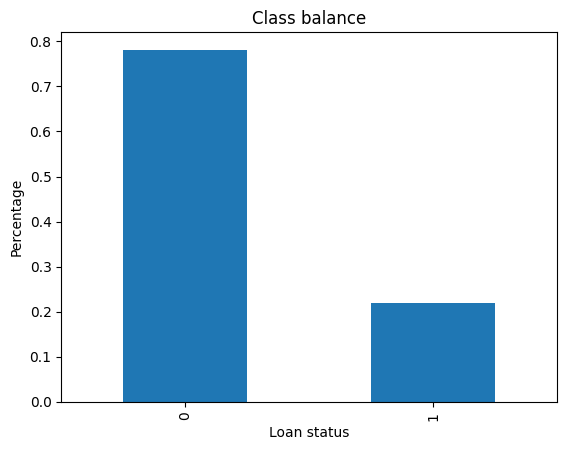

In [10]:
# check for the class blance of the target variable
df["loan_status"].value_counts(normalize =True).plot(kind = "bar")
plt.xlabel("Loan status")
plt.ylabel("Percentage")
plt.title("Class balance");

From the dataset the percentage of the customers who had default on their loan is 22% and those who didn't  is 78%. The class is balanced.

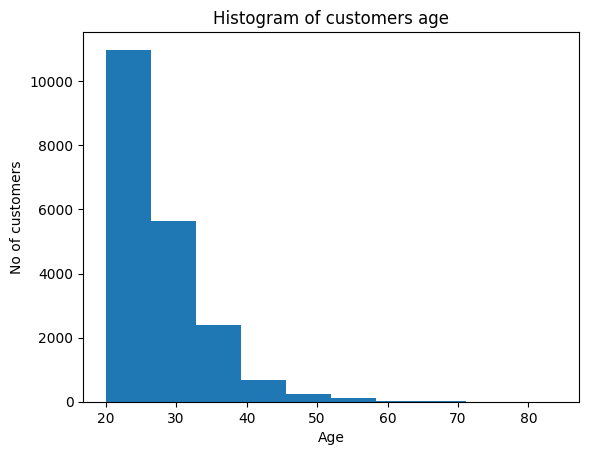

In [11]:
# Distribution of the person age
df["person_age"].plot(kind = "hist")
plt.title("Histogram of customers age")
plt.xlabel("Age")
plt.ylabel("No of customers");

Most of the customers were of the age between 20 to 40 years.

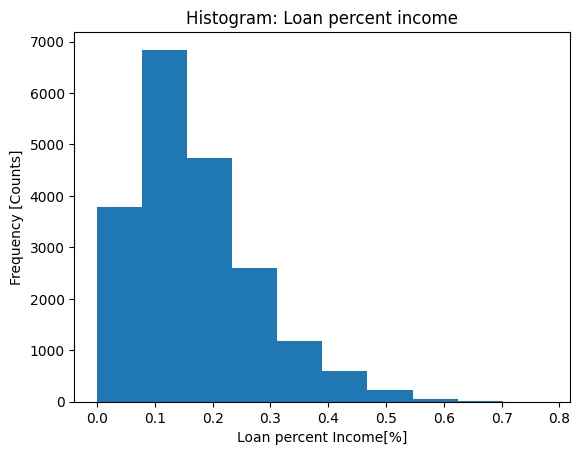

In [12]:
# Histogram of the loan of the percent of the income
df["loan_percent_income"].plot(kind = "hist")
plt.title("Histogram: Loan percent income")
plt.xlabel("Loan percent Income[%]")
plt.ylabel("Frequency [Counts]");

Loan percent income of the most applicants was below 0.4 %

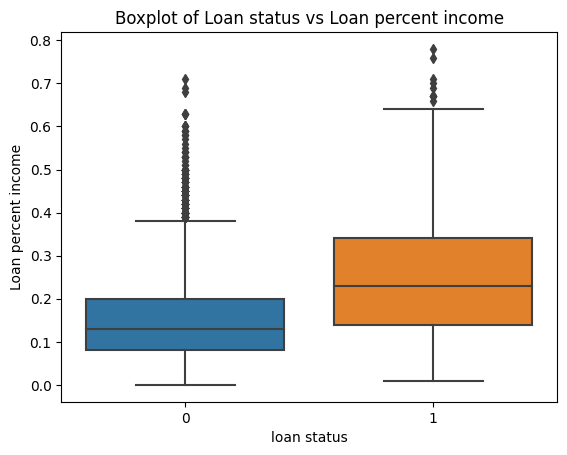

In [13]:
# Box plot of the relationship btwn loan % income and loan status
sns.boxplot(data = df, x = "loan_status", y = "loan_percent_income")
plt.title("Boxplot of Loan status vs Loan percent income")
plt.xlabel("loan status")
plt.ylabel("Loan percent income");

The 75% of the applicants whose loan was approved there loan percent income ratio ranges from 8% to 20%. And for those whom there loan application was not approved ranges from 15% to 35%.

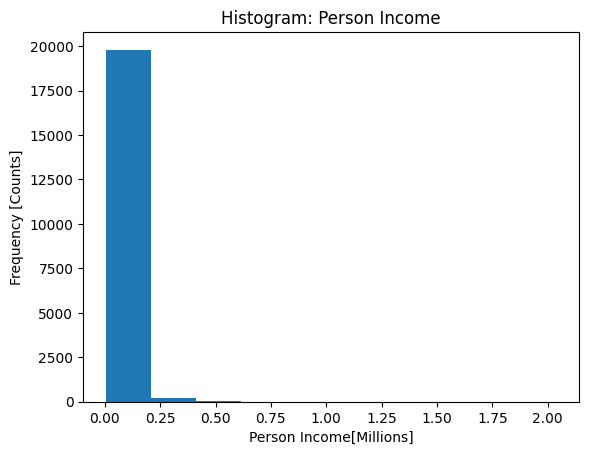

In [14]:
# Histogram of the person income.
(df["person_income"] / 1e6).plot(kind = "hist")
plt.title("Histogram: Person Income")
plt.xlabel("Person Income[Millions]")
plt.ylabel("Frequency [Counts]");

The income of most applicants is less than $250000 per annum

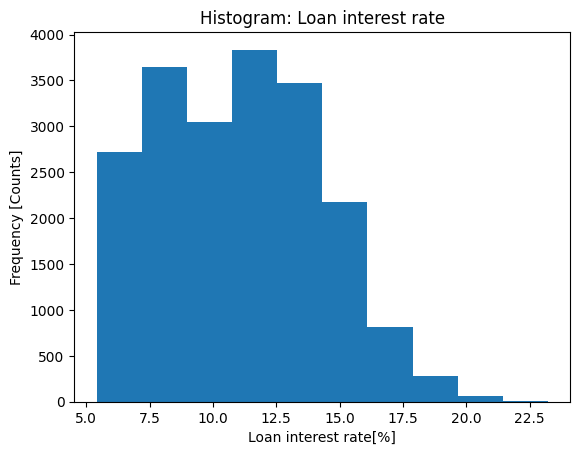

In [15]:
# Histogram of the loan int rate
df["loan_int_rate"].plot(kind = "hist")
plt.title("Histogram: Loan interest rate")
plt.xlabel("Loan interest rate[%]")
plt.ylabel("Frequency [Counts]");

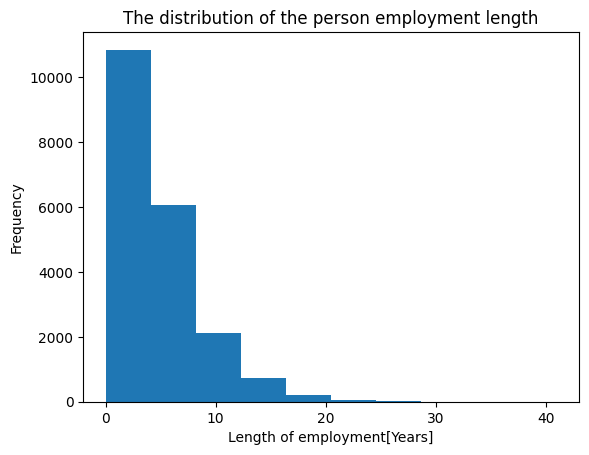

In [16]:
# distribution of the length of the employment
df["person_emp_length"].plot(kind = "hist")
plt.xlabel("Length of employment[Years]")
plt.ylabel("Frequency")
plt.title("The distribution of the person employment length");


Most of the customers had employment length of 0 to 15 years.

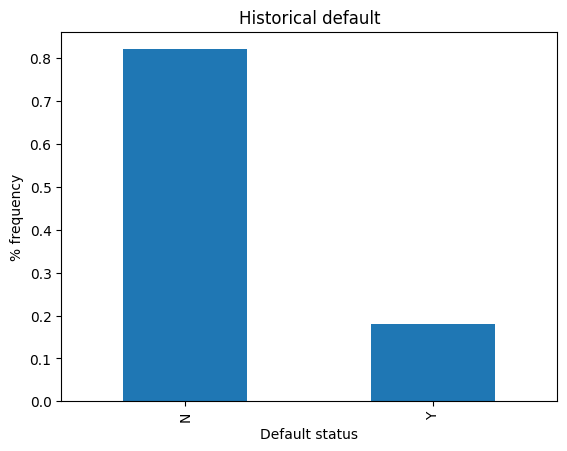

In [17]:
df["cb_person_default_on_file"].value_counts(normalize = True).plot(kind = "bar")
plt. title("Historical default")
plt.xlabel("Default status")
plt.ylabel("% frequency");

The customers who had history of default on the dataset is 18 % and 82% had no any history of default.

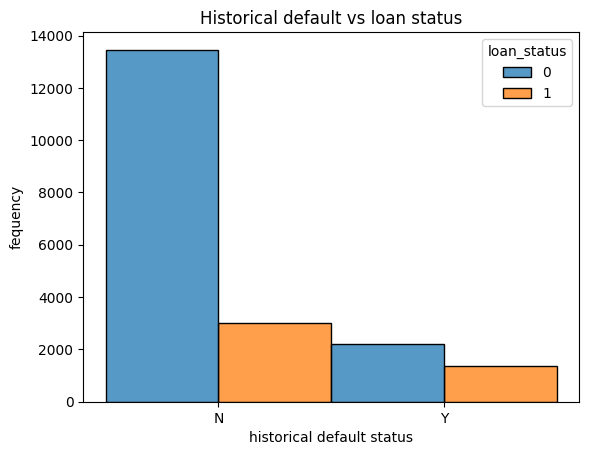

In [18]:
sns.histplot(x = "cb_person_default_on_file", hue = "loan_status", data = df, stat = "count", multiple = "dodge")
plt.title("Historical default vs loan status")
plt.xlabel("historical default status")
plt.ylabel("fequency");

The customers who had a history of loan default have high chances of defaulting on loan compared to the customer's with no default history.

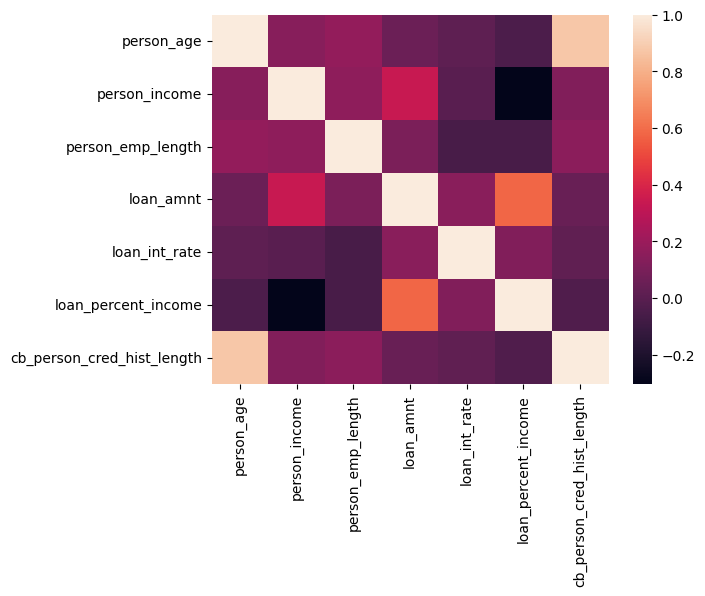

In [19]:
# check for multicollineality in the in the features
numerical_columns =df.select_dtypes("number").drop(columns = ["loan_status"])
sns.heatmap(numerical_columns.corr());


In [20]:
# Drop high correlated features
df.drop(columns = ["person_age", "loan_amnt"], inplace = True)

The high correlated features are dropped, inorder to prevent the model from overfitting.

## Split the data

In [21]:
# Split the data into target and feature
target = "loan_status"
X = df.drop(columns =target)
y = df[target]


In [22]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.20,
    random_state = 42
)
print(y_train.shape)
print(y_test.shape)

(16050,)
(4013,)


## Build the model

In [23]:
# Create a random forest classifier to be trained by X_train and y_train
clf =make_pipeline(OneHotEncoder(use_cat_names = True), RandomForestClassifier(random_state = 42))
clf

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [24]:
# Performing cross-validation(cv) with the classiffiers using X_train and y_train to determine the best classifier to use
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5, n_jobs = -1)
print(cv_scores)

[0.92554517 0.92803738 0.92834891 0.93520249 0.92274143]


In [25]:
# Create a dictionary named parameter with the range of hperparameters i want evaluate for the classifier
parameter = {
    "randomforestclassifier__max_depth": range(5, 50, 5),
    "randomforestclassifier__n_estimators": range(10, 100, 10)
}

In [26]:
# Create a model using gridsearch, in the model the parameter and classifier is combined
model = GridSearchCV(clf, parameter, cv = 5, n_jobs = -1, verbose = 1)
# Fit the model 
model.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(5, 50, 5),
                         'randomforestclassifier__n_estimators': range(10, 100, 10)},
             verbose=1)

In [27]:
# The best parameters for the model
best_params = model.best_params_
best_params

{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__n_estimators': 80}

In [28]:
# Accuracy score of the model
model.score(X_test, y_test)

0.9282332419636182

In [29]:
# Read credit_risk_dataset_test dataset into data frame
credit_risk_dataset_test = pd.read_csv("credit_risk_dataset_test.csv")
# Drop the columns of person_age , loan_amount and loan status in the credit_risk_dataset_test dataset
credit_risk_dataset_test.drop(columns = ["person_age", "loan_amnt", "loan_status"], inplace = True)
# Drop the missing values in the credit_risk_dataset_test
credit_risk_dataset_test.dropna(inplace = True)

In [30]:
# Predict the missing values of the loan_status using the model and credit_risk_dataset_test and convert into a list
loan_status = model.predict(credit_risk_dataset_test).tolist()


In [31]:
# Insert the predicted loan status value into Credit risk status dataset
credit_risk_dataset_test["loan_status"]= loan_status
credit_risk_dataset_test

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,9600,MORTGAGE,1.0,MEDICAL,C,12.87,0.57,N,3,1
1,54400,RENT,8.0,MEDICAL,C,14.27,0.55,Y,4,1
2,78956,RENT,5.0,MEDICAL,B,11.11,0.44,N,4,1
3,108160,RENT,4.0,EDUCATION,E,18.39,0.32,N,4,1
4,92111,RENT,7.0,MEDICAL,F,20.25,0.32,N,4,1
...,...,...,...,...,...,...,...,...,...,...
9726,30000,RENT,6.0,VENTURE,C,12.73,0.17,N,18,0
9727,49008,OWN,5.0,PERSONAL,C,13.79,0.24,Y,21,0
9728,45600,RENT,1.0,VENTURE,B,10.00,0.44,N,26,1
9729,64500,RENT,0.0,EDUCATION,B,11.26,0.08,N,20,0


## Cummunicate the results

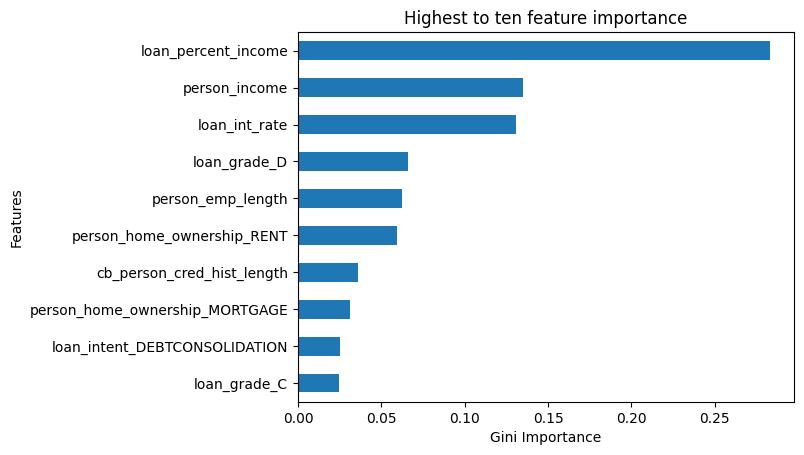

In [32]:
# Feature names
features = model.best_estimator_.named_steps["randomforestclassifier"].feature_names_in_
# Feature importances
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Feature importance series
feat_importances = pd.Series(importances, index = features).sort_values()
# Plot top ten feature importance
feat_importances.tail(10).plot(kind = "barh")
plt.title("Highest to ten feature importance")
plt.ylabel("Features")
plt.xlabel("Gini Importance");

## Three ideas on how to increase the % of successful loan applicants

1. Raise the loan percent income ratio  to 0.40 so that the customers with high income ratio be able to meet the loan requirements.

2. Lower the emplyment length (years) required for customer to meet the loan requirements to atleast one year.

3. Lower the interest rate on the loan to at most 15%.